## Iris Species Classification Project

#### Contributors: Alexis Pendleton, Andrew Dorado, Neira Ibrahimovic, and Lillian Gabrelian

### Goal

The aim of this project is to create a model that can predict an iris flower species based on a combination of features.

### Importing the Data

Before we are able to do any iris species classification, we must import the Python packages, our custom class `IrisClassifier`, and the data file, `Iris.csv`, that we'll be working with.

In [1]:
# import Python packages to be used 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

# import IrisClassifier class from irisClassification.py
from irisClassification import IrisClassifier

In [2]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

numpy version: 1.21.5
pandas version: 1.4.2


In [3]:
# read in Iris.csv into a Pandas dataframe, `iris`
iris = pd.read_csv("Iris.csv")
# then, view the first 5 rows of the dataframe
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# see how many of each iris species are in our dataframe
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

To make it easier to work with, we will be shortening the species names from 'Iris-setosa,' 'Iris-versicolor,' and 'Iris-virginica' to just 'setosa,' 'versicolor,' and 'virginica.'

In [5]:
# shorten the species name to remove the 'Iris-' from the beginning
iris["Species"] = iris["Species"].str.split('-').str.get(1)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [6]:
# view updated species names and their counts
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

Then, we will create an instance of the class `IrisClassifier` that will take in our `iris` dataframe as an argument

In [7]:
ic = IrisClassifier(iris) # create instance of `IrisClassifier` and call it `ic`

In [8]:
# Uncomment this code block to see an example of exception handling in IrisClassifier.__init__()
# ic = IrisClassifier("Iris.csv")

### Exploring the Data

Before creating our decision tree function that would allow us to classify our Iris species based on their characteristics, we explored the data by creating various tables and plots in order to learn more about the ways in which these species differed from one another. 

--------------------------------------------------

**testing summary_table()**

We can do this by first creating summary tables that can show us where there are any noticeable differences across these iris species in regards to different features of their data. This can be done using the `summary_table()` method of `IrisClassifier.`

In [9]:
# testing summary_table()

# group iris species by sepal length and sepal width
ic.summary_table("Species", ["SepalLengthCm", "SepalWidthCm"])

SepalLengthCm           SepalWidthCm          
                    mean       std         mean       std
Species                                                  
setosa             5.006  0.352490        3.418  0.381024
versicolor         5.936  0.516171        2.770  0.313798
virginica          6.588  0.635880        2.974  0.322497

In the table above, it is apparent that the virginica iris has the largest average sepal length, at 6.588 cm, and the setosa iris has the smallest average sepal length, at 5.006 cm. However, by looking at the standard deviations for sepal length, we can see that there are some points in which virginica and versicolor may overlap, and other points at which versicolor and setosa may overlap. So, if we want to use sepal length to differentiate between iris species, it may be most helpful in differentiating between setosa and virginica irises, and less for any other combination.

In terms of sepal width, setosa seems to have the largest average while versicolor seems to have the lowest. However, given their standard deviations, it looks like there can be some places where all of the iris species overlap in sepal width. So, it may not be the most helpful parameter to use to differentiate between species.

In [10]:
# group iris species by petal length and petal width
ic.summary_table("Species", ["PetalLengthCm", "PetalWidthCm"])

PetalLengthCm           PetalWidthCm          
                    mean       std         mean       std
Species                                                  
setosa             1.464  0.173511        0.244  0.107210
versicolor         4.260  0.469911        1.326  0.197753
virginica          5.552  0.551895        2.026  0.274650

In the next table (above), iris species are grouped by their petal length and their petal width.

Regarding petal length, there seems to be a lot of variation and not much overlap in terms of the means and standard deviations for the 3 species, which is a promising indication that this may be a useful feature to help us differentiate between the 3 species. The same can be said for petal width.

More specifically, it seems like the petal length for virginica would stay above 5 cm in most instances, while the petal length for setosa would stay under 2 cm in most instances. 

Additionally, it seems like the petal width for setosa would stay under 1 cm, and would be highest for virginica.

In [11]:
# Uncomment this code block to see an example of exception handling in IrisClassifier.summary_table()
#ic.summary_table("SepalLength", "SepalWidth")

------------------------------------------------
**testing visualize_scatter()**

After looking at these summary tables, then, we can generate some scatter plots using the `visualize_scatter()` method of `IrisClassifier`

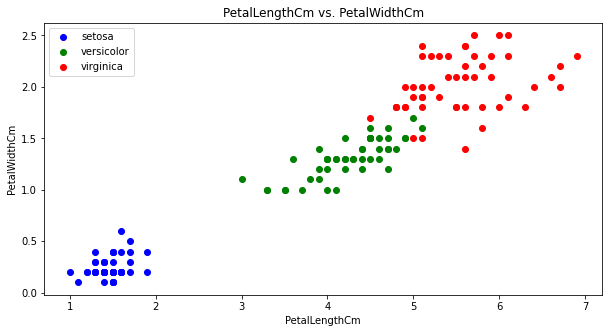

In [12]:
# satterplot for petal length vs petal width
ic.visualize_scatter("PetalLengthCm","PetalWidthCm")

Above, we can see that setosa has the smallest petal length and width, virginica generally has the largest, and versicolor has petal length/widths that mostly between the other two species. Furthermore, we can see that there's a bit of overlap between the lengths and widths of versicolor and virginica species.

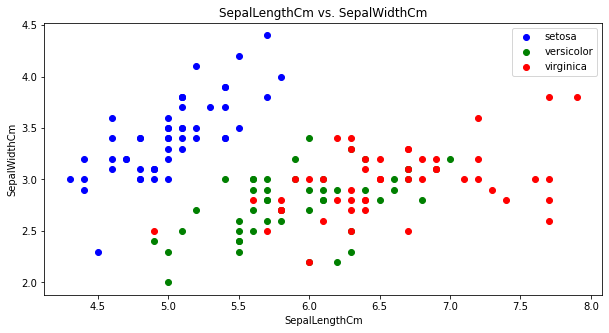

In [13]:
# satterplot for sepal length vs sepal width
ic.visualize_scatter("SepalLengthCm","SepalWidthCm")

The above graph shows sepal length vs sepal width plotted for the three iris species. From this plot, it is evident that the sepal lengths and widths of versicolor and virginica species have a lot of overlap with one another. There also seems to be overlap between the sepal lengths of setosa and versicolor, and setosa and virginica. Additionally, the sepal length for setosa seems to be on the lower end and the sepal width seems to be on the higher end. 

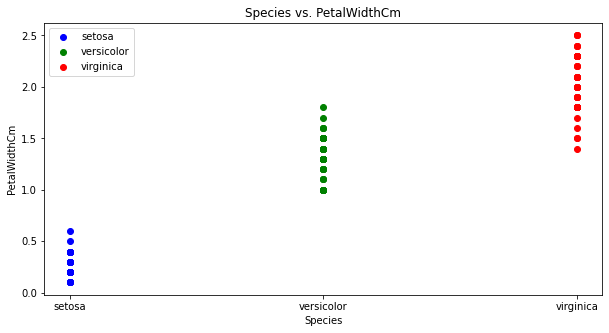

In [14]:
# satterplot for species vs petal width
ic.visualize_scatter("Species","PetalWidthCm")

The graph above shows petal width values plotted by species. From this graph, it is evident that setosa irises generally have the smallest petal widths, and can be distinguished quite well from the other two species because of a lack of overlap with their petal widths and those for versicolor and virginica species. Meanwhile, it seems like virginica irises have the greatest petal widths out of all of the iris species. However, there seems to be a pretty big overlap between the petal width of versicolor and virginica species. This suggests that petal width may be a helpful parameter to use to differentiate between setosa irises and non-setosa irises, but may be less helpful, though not completely unhelpful, to distinguish between versicolor and virginica irises.

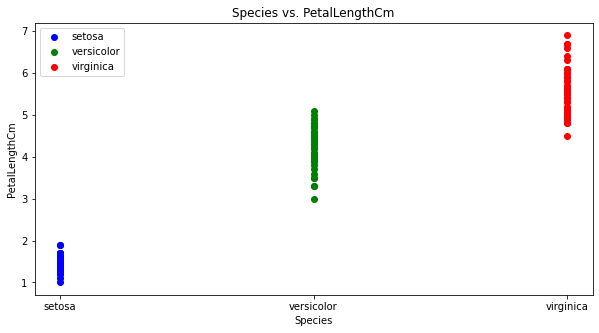

In [15]:
# satterplot for species vs petal length
ic.visualize_scatter("Species","PetalLengthCm")

The graph above, which shows petal length values plotted by species, shows similar trends as the previous graph which plotted petal width by species. This suggests that petal length and width may be related to/inherited with one another. Overall, however, there seems to be a bit more variation in petal lengths among the same species when compared to the variation in petal widths, which can be seen by how the blue, green, and red points that represent a single iris species look more like dots that are plotted a on top of one another for the species vs petal width plots, and look more blurred, continuous, and almost linear in the species vs petal length plots.

Given how similar the trends between this graph and the previous one are, petal length can likely be used much in the same way as petal width in predicting the species of an iris flower.

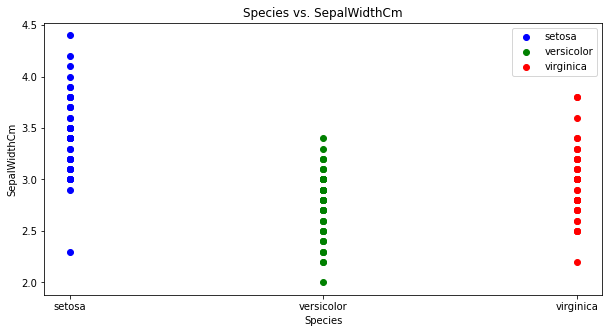

In [16]:
# satterplot for species vs sepal width
ic.visualize_scatter("Species", "SepalWidthCm")

The species vs sepal width graph above shows a lot more overlap between the sepal widths for the three different iris species that the previous two scatterplots showed. It seems like the largest sepal widths are found in setosa irises while the smallest ones are found in versicolor. But, it does not seem like it will be the most useful parameter to use in order to predict the species of an iris.

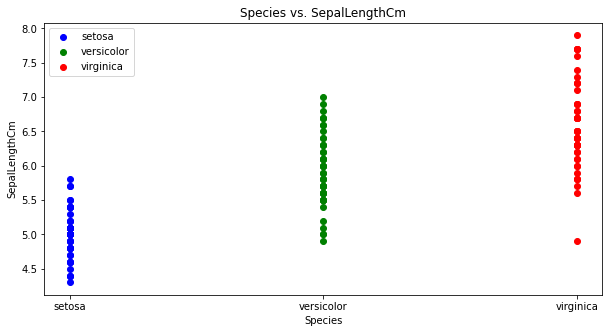

In [17]:
# satterplot for species vs sepal length
ic.visualize_scatter("Species","SepalLengthCm")

In the above scatterplot for species vs sepal length, we can see that there are points at which the sepal length values for each of the three species overlap with one another. There's a few samples of setosa irises which have somewhat smaller sepal lengths, and a few samples of virginica irises which have somewhat larger sepal lengths, but it seems like sepal length may not be a very helpful indicator for species.

------------------------------
**testing visualize_hist()**

We can also generate some histograms using the `visualize_hist()` method of `IrisClassifier`

The function `visualize_hist()` takes in one of the four measurements, 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', or 'PetalWidthCm', and creates a histogram for that parameter with all of the flower species overlaid. The purpose of this function is to determine which measurements could be used to distinguish one flower species from another in the making of a decision tree. 

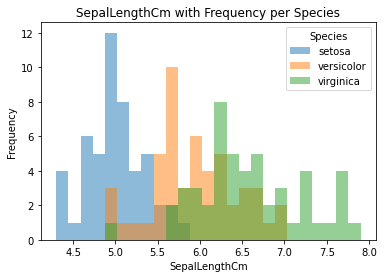

In [18]:
# histogram for sepal length per iris species
ic.visualize_hist(iris, "SepalLengthCm")

When we look at the histogram for Sepal Length above, we could see that there is a lot of overlap between the different species. Because of this, it is not ideal to use this measurement in our decision tree function, as one species cannot be easily distinguished from another soleley on the basis of their sepal lengths.

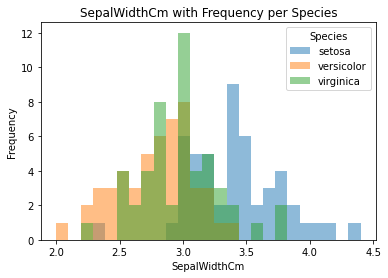

In [19]:
# histogram for sepal width per iris species
ic.visualize_hist(iris, "SepalWidthCm")

Upon analyzing the histogram for Sepal Width (above), we similarly observe that all of the species are heavily overlapped, so sepal width would not be a good measurement to use to distinguish between different species. Therefore, we chose not to use sepal width in our decision tree.

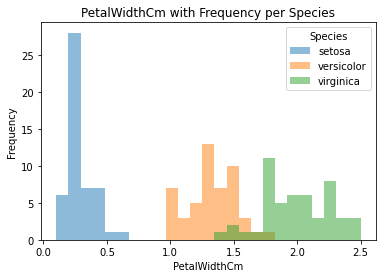

In [20]:
# histogram for petal width per iris species
ic.visualize_hist(iris, "PetalWidthCm")

When we look at the histogram for Petal Width (above), we could see that the different flower species are segregated and easily distinguishable. Therefore, we identified this measuremement as a strong one to use for our decision tree. First, we could distinguish setosa from the rest of the flowers by the fact that every setosa flower has a petal width less than 0.8 cm. This was the first branch in our decision tree. Then, we can distinguish virginica from the rest of the flowers based on the fact that most of its flowers have a petal width above 1.75 cm. This was the next branch of our decision tree. 

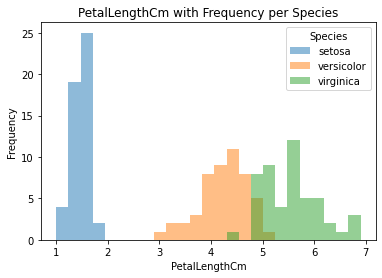

In [21]:
# histogram for petal length per iris species
ic.visualize_hist(iris, "PetalLengthCm")

When looking at the histogram for Petal Length (above), we could again see that the different flower species are easily distinguishable, with only very slight overlap. We could distinguish versicolor from the flowers we already identified by looking at petal lengths less than or equal to 4.95 cm.

In [22]:
# Uncomment this code block to see an example of exception handling in IrisClassifier.visualize_hist()
#ic.visualize_hist(iris, "PetalLength")

### Creating and testing our own decision tree function

**testing max_min()**

The `max_min()` function in `IrisClassifier` was created to get the numbers needed to make our own decision tree.
A demo of the function can be seen below for Petal Width and Length.

In [23]:
# get max and min of setosa's petal width
ic.max_min("setosa", "PetalWidthCm")


The min PetalWidthCm for setosa is 0.1.
 
The max PetalWidthCm for setosa is 0.6.



In [24]:
# get max and min of virginica's petal width
ic.max_min("virginica", "PetalWidthCm")


The min PetalWidthCm for virginica is 1.4.
 
The max PetalWidthCm for virginica is 2.5.



In [25]:
# get max and min of versicolor's petal width
ic.max_min("versicolor", "PetalWidthCm")


The min PetalWidthCm for versicolor is 1.0.
 
The max PetalWidthCm for versicolor is 1.8.



In [26]:
# get max and min of setosa's petal length
ic.max_min("setosa", "PetalLengthCm")


The min PetalLengthCm for setosa is 1.0.
 
The max PetalLengthCm for setosa is 1.9.



In [27]:
# get max and min of virginica's petal length
ic.max_min("virginica", "PetalLengthCm")


The min PetalLengthCm for virginica is 4.5.
 
The max PetalLengthCm for virginica is 6.9.



In [28]:
# get max and min of versicolor's petal length
ic.max_min("versicolor", "PetalLengthCm")


The min PetalLengthCm for versicolor is 3.0.
 
The max PetalLengthCm for versicolor is 5.1.



**Observations from Max Min Function**

- In regards to PetalWidthCm setosa is the most different of the dataset having values from 0.1 to 0.8. This means it would be a very good parameter to use in our function since none of the other species overlap with these values.
- For PetalLengthCm the species that has data that doesn't overlap is virginca, with a min of 4.5 and a max of 6.9. This means the PetalLengthCm would be best to determine when a species is virginca in our decision tree.

In [29]:
# Uncomment this code block to see an example of exception handling in IrisClassifier.max_min()
#ic.max_min("Iris-versicolor", "PetalLength")

------------------------------
**Choosing our parameters for `decision_tree()`**

So, the decision tree values were estimated by looking at the mean, min, and max of the PetalWidth, PetalLength, SepalWidth, and
SepalLength measurements of each of the iris samples in Iris.csv

In [30]:
cols = ["SepalLengthCm","SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
ic.summary_table('Species', cols)
# Use of our class method

SepalLengthCm           SepalWidthCm           PetalLengthCm  \
                    mean       std         mean       std          mean   
Species                                                                   
setosa             5.006  0.352490        3.418  0.381024         1.464   
versicolor         5.936  0.516171        2.770  0.313798         4.260   
virginica          6.588  0.635880        2.974  0.322497         5.552   

                     PetalWidthCm            
                 std         mean       std  
Species                                      
setosa      0.173511        0.244  0.107210  
versicolor  0.469911        1.326  0.197753  
virginica   0.551895        2.026  0.274650

In [31]:
list_of_species = {"setosa", "versicolor", "virginica"}
list_of_features = {"SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"}
for species in list_of_species:
    for feature in list_of_features:
        ic.max_min(species,feature)


The min SepalLengthCm for versicolor is 4.9.
 
The max SepalLengthCm for versicolor is 7.0.


The min SepalWidthCm for versicolor is 2.0.
 
The max SepalWidthCm for versicolor is 3.4.


The min PetalWidthCm for versicolor is 1.0.
 
The max PetalWidthCm for versicolor is 1.8.


The min PetalLengthCm for versicolor is 3.0.
 
The max PetalLengthCm for versicolor is 5.1.


The min SepalLengthCm for virginica is 4.9.
 
The max SepalLengthCm for virginica is 7.9.


The min SepalWidthCm for virginica is 2.2.
 
The max SepalWidthCm for virginica is 3.8.


The min PetalWidthCm for virginica is 1.4.
 
The max PetalWidthCm for virginica is 2.5.


The min PetalLengthCm for virginica is 4.5.
 
The max PetalLengthCm for virginica is 6.9.


The min SepalLengthCm for setosa is 4.3.
 
The max SepalLengthCm for setosa is 5.8.


The min SepalWidthCm for setosa is 2.3.
 
The max SepalWidthCm for setosa is 4.4.


The min PetalWidthCm for setosa is 0.1.
 
The max PetalWidthCm for setosa is 0.6.


The min P

It is also helpful to display a scatterplot of the different features for each species

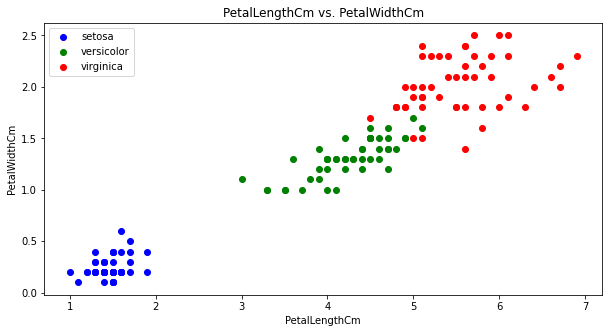

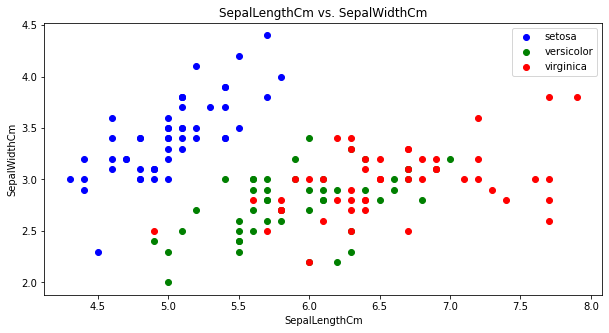

In [32]:
ic.visualize_scatter('PetalLengthCm', 'PetalWidthCm')
ic.visualize_scatter('SepalLengthCm', 'SepalWidthCm')

-----------------------------------
**testing decision_tree()**

With a petal width of 0.2 cm and a petal length of 1.4 cm, we expect to see the setosa flower. Our decision tree accurately made this prediction.

In [33]:
ic.decision_tree(0.2, 1.4)

'setosa'

With a petal width of 1.3 cm and a petal length of 4.0 cm, we expect to see the versicolor flower. Our decision tree accurately made this prediction.

In [34]:
ic.decision_tree(1.3, 4.0)

'versicolor'

With a petal width of 1.9 cm and a petal length of 5.0 cm, we expect to see the virginica flower. Our decision tree accurately made this prediction.

In [35]:
ic.decision_tree(1.9, 5.0)

'virginica'

In [36]:
# Uncomment this code block to see an example of exception handling in IrisClassifier.decision_tree()
#ic.decision_tree("PetalWidthCm", "PetalLengthCm")

#### Comparing our decision tree function to the computer generated decision tree

In [37]:
 def fit_tree(X, y, d):
    '''
    Creates a computer generated decision tree using the scikit-learn module
    Args:
        X: feature(s) that will be used to predict the labels/classifications
        y: labels/classifications to be predicted
        d: an integer, the max_depth of the tree
    Returns:
        the DecisionTreeClassifier T
    '''
    # create an instance of DecisionTreeClassifier of maxdepth d
    T = tree.DecisionTreeClassifier(max_depth=d)
    # fit T to the data and return it
    T.fit(X, y)
    return T

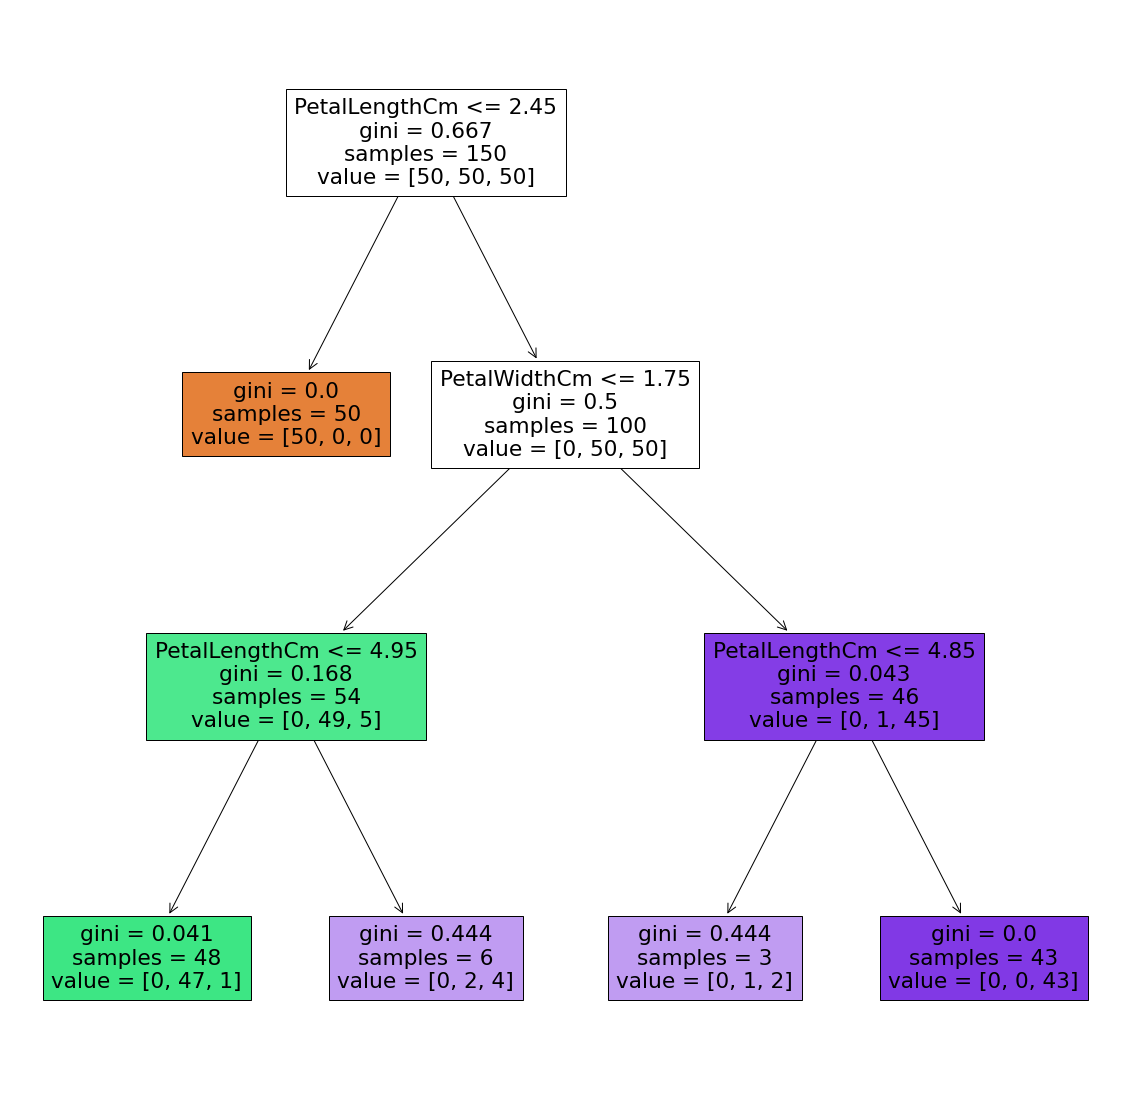

In [38]:
y = iris["Species"] # we want to predict species
 # want to predict species from data (excluding the species title and id #)
x = iris.drop(["Species", "Id"], axis=1)
 # so, fit a decision tree of depth 3 with these parameters and display it
T = fit_tree(x, y, 3)
fig, ax = plt.subplots(1, 1, figsize=(20,20))
p = tree.plot_tree(T, filled=True, feature_names=x.columns)

In [39]:
# split our data into testing and training populations
# train with 60% of the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
# fit another decision tree with the train data
T2 = fit_tree(X_train, y_train, 3)

# score training and testing scores
train_score = T2.score(X_train, y_train)
test_score = T2.score(X_test, y_test)

print('train score:', train_score)
print('test score:', test_score)

train score: 0.9777777777777777
test score: 0.9666666666666667


In [40]:
# In order to do a test on our decision tree, this lambda function was used with the 
# two parameters of all the iris samples
guesser = lambda r: ic.decision_tree(r["PetalWidthCm"], r["PetalLengthCm"]) 
iris["Guess"] = iris.apply(guesser, axis = 1)
x = (iris['Species']==iris['Guess']).mean()
print(f' Our decision tree score: {x}')

 Our decision tree score: 0.9733333333333334


Against the data our decision tree had an accuracy of 97%, while the computer generated decision tree had a score of ~98% on training data. The computer generated tree also had an accuracy of 98% on testing data. The test data was 40% of the training data. This confirms that our model didn't show any signs of overfitting.

#### Conclusion

Thus, we were able to explore the iris data through creating numerous data visualizations of histograms and scatterplots, and by analyzing the numerical trends in the data by looking at the mean, standard deviation, maximum, and minimum values for petal length, petal width, sepal length, and sepal width for the iris species (setosa, versicolor, and virginica). 

From this exploration, we learned that an iris's petal length and width could be good indicators of its species, and were able to create our own decision tree function to predict an iris's species based on these parameters.

Then, after running a sci-kit learn decision tree and comparing its score with the score of our decision tree function, we were able to see how they compared. Overall, our decision tree had a pretty high accuracy score.